In [31]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [28]:
print(acc_nb)
print(acc_lr)

0.524
0.9216


In [29]:
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_nb)
print(cf_lr)

[[ 828    0    1    7    2    5   19    0   90   28]
 [   1 1067    0    0    1    0    7    0   50    9]
 [ 110   16  182  104    7    5  254    3  329   22]
 [  40   24    4  282    1    3   34    7  505  110]
 [  24    2    3    4  129    5   30    5  273  507]
 [  55   15    1   16    2   29   27    2  645  100]
 [  17   11    3    1    1    5  877    0   42    1]
 [   0   11    2    9    5    1    5  201   74  720]
 [  12   53    3    6    2   11   10    1  684  192]
 [   4    5    3    6    0    0    1    9   20  961]]
[[ 948    0    3    4    2   11    6    3    3    0]
 [   0 1108    8    3    0    2    3    1   10    0]
 [  10   10  919   17   11    5   12    7   37    4]
 [   3    1   20  920    2   22    3   11   21    7]
 [   1    4   10    4  915    1    7    7    6   27]
 [  10    5    3   33    9  774   14    8   32    4]
 [   8    4   11    3    5   17  909    0    1    0]
 [   3    8   23    7    6    2    0  943    6   30]
 [  10   12    5   23    8   28    9    8  85

In [30]:
cr_nb = classification_report(y_test, y_pred_nb)
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_nb)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1028
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52     10000
   macro avg       0.67      0.52      0.47     10000
weighted avg       0.68      0.52      0.48     10000

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90 

In [50]:
y_prob_nb = nb.predict_proba(X_test)[:, 1]
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [51]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr, pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

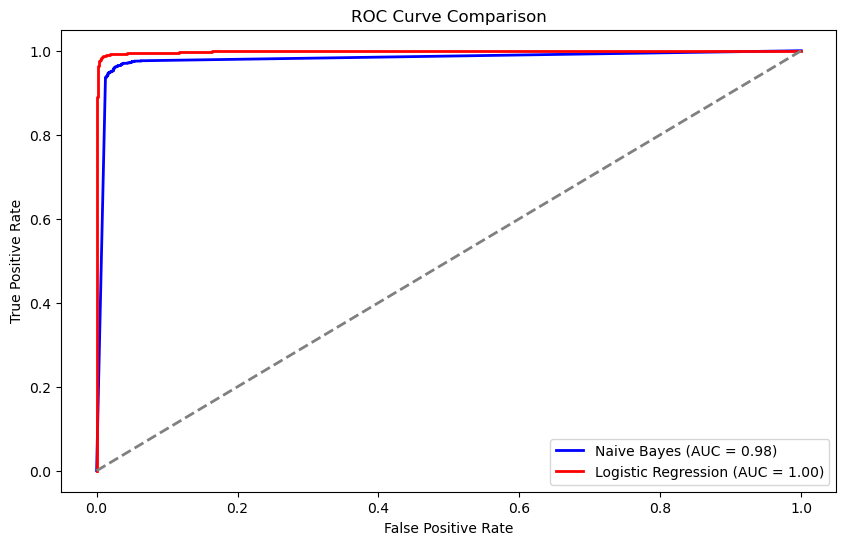

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [52]:
def plot_lift_gain(y_true, y_pred, model_name):
    sorted_indices = np.argsort(y_pred)[::-1]
    sorted_y_true = y_true[sorted_indices]
    n = len(y_true)
    deciles = np.linspace(0, n, 11).astype(int)
    gain = [np.sum(sorted_y_true[:d]) / np.sum(sorted_y_true) for d in deciles]
    lift = [gain[i] / (deciles[i] / n) for i in range(1, len(deciles))]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), lift, label=f'{model_name} Lift', color='blue', marker='o')
    plt.plot(range(1, 11), gain[1:], label=f'{model_name} Gain', color='red', marker='s')
    plt.title(f'{model_name} Lift and Gain Chart')
    plt.xlabel('Deciles')
    plt.ylabel('Lift / Gain')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

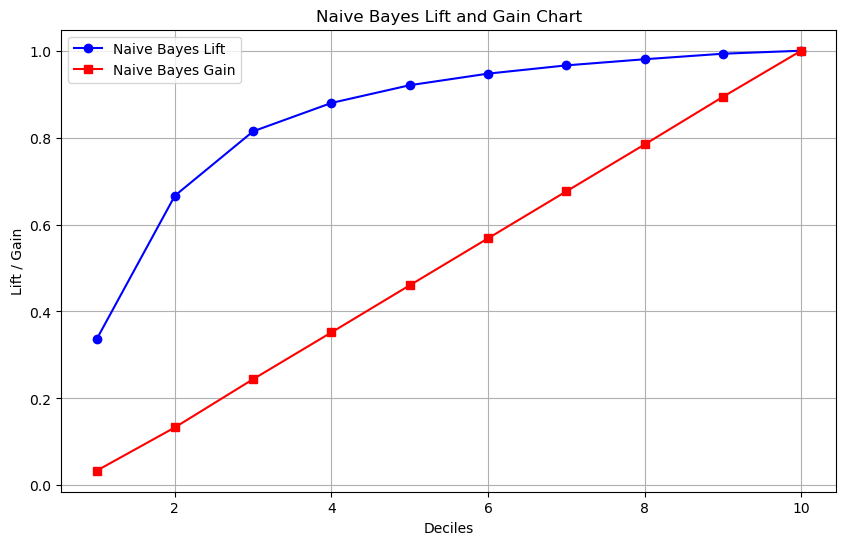

In [53]:
plot_lift_gain(y_test, y_prob_nb, 'Naive Bayes')

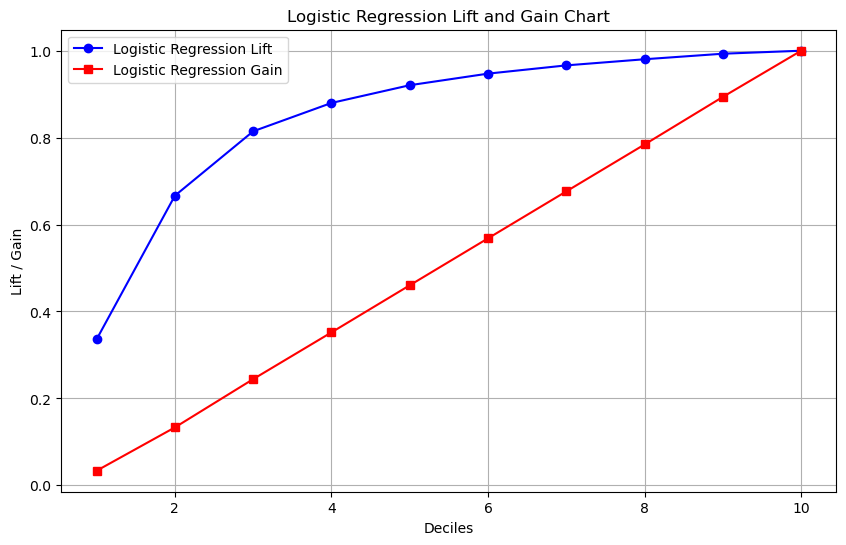

In [54]:
plot_lift_gain(y_test, y_prob_nb, 'Logistic Regression')